In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers,optimizers
import tensorflow as tf
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

2024-07-26 18:33:52.732609: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-26 18:33:52.863616: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-26 18:33:52.863719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-26 18:33:52.866120: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-26 18:33:52.881327: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-26 18:33:52.882465: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
data = pd.read_csv('IMDB Dataset.csv')

In [3]:
print(data.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [4]:
reviews = data['review']
labels = data['sentiment']
labels = labels.map({'positive':1,'negative':0})
print(labels.head())

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64


In [5]:
corpus = []
punctuation = string.punctuation
for review in reviews:
    review.replace('<br />','')
    refined_text = ''
    for word in review:
        if word not in punctuation:
            refined_text +=word
    corpus.append(refined_text)

In [6]:
stemmed_corpus = []
stemmer = PorterStemmer()
for review in corpus:
    words = review.split(" ")
    refined_text = ""
    for word in words:
        refined_text = refined_text + stemmer.stem(word) + " "
    stemmed_corpus.append(refined_text)

In [7]:
nltk.download('stopwords')
corpus = []
stop = []
stopwords = stopwords.words('english')
for review in stemmed_corpus:
    words = review.split(" ")
    refined_text = ""
    for word in words:

        if word not in stopwords:
            refined_text += word
            corpus.append(refined_text)


[nltk_data] Downloading package stopwords to /home/hassan-ahmed-
[nltk_data]     khan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stemmed_lemitized_corpus = []
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
for sentence in stemmed_corpus:
  refined_text = ""
  words = sentence.split(" ")
  for word in words:
    refined_text += lemmatizer.lemmatize(word) + " "
  stemmed_lemitized_corpus.append(refined_text.strip())


[nltk_data] Downloading package wordnet to /home/hassan-ahmed-
[nltk_data]     khan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
max_features = 10000
max_len = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'


tokenizer = Tokenizer(num_words=max_features, oov_token=oov_tok)


tokenizer.fit_on_texts(stemmed_lemitized_corpus)

sequences = tokenizer.texts_to_sequences(stemmed_lemitized_corpus)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)


In [10]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
# print(len(sequence[0]))
print(word_index['the'])

Found 143929 unique tokens.
2


In [11]:
x_train = padded_sequences[:40000]
x_test = padded_sequences[40000:]
y_train = labels[:40000]
y_test = labels[40000:]

In [12]:
model = models.Sequential()
model.add(layers.Embedding(10000,8,input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [13]:
history= model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
1000/1000 [==============================] - 14s 13ms/step - loss: 0.5867 - acc: 0.6963 - val_loss: 0.4472 - val_acc: 0.8002
Epoch 2/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3819 - acc: 0.8331 - val_loss: 0.3877 - val_acc: 0.8225
Epoch 3/10
1000/1000 [==============================] - 13s 13ms/step - loss: 0.3300 - acc: 0.8577 - val_loss: 0.3775 - val_acc: 0.8282
Epoch 4/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3013 - acc: 0.8741 - val_loss: 0.3814 - val_acc: 0.8249
Epoch 5/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.2785 - acc: 0.8857 - val_loss: 0.3893 - val_acc: 0.8234
Epoch 6/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2573 - acc: 0.8964 - val_loss: 0.3989 - val_acc: 0.8213
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2363 - acc: 0.9067 - val_loss: 0.4115 - val_acc: 0.8198
Epoch 8/10
1000/1000 [==============================] - 3s

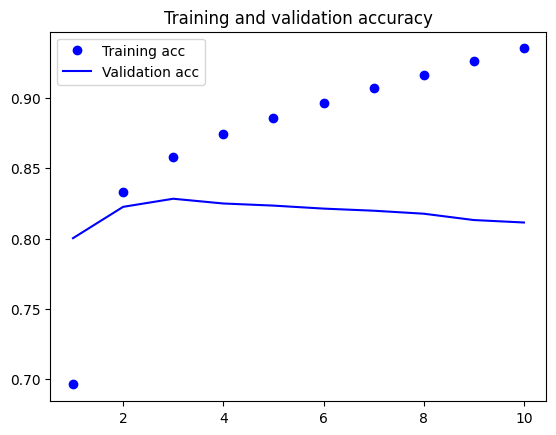

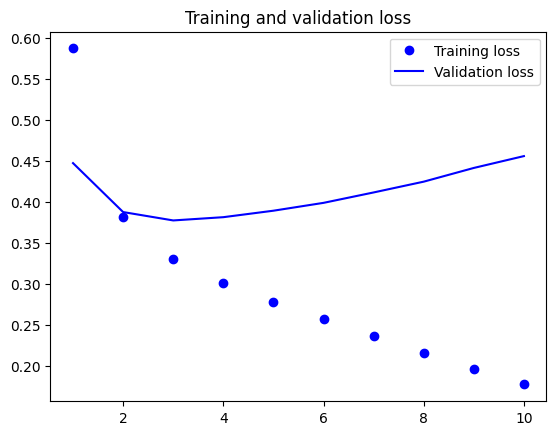

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [15]:
embedding = {}
num_words = 10000
embedding_dim = 100

glove_dir = r'glove.6b/glove.6B.100d.txt'
with open(glove_dir, 'r', encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        coef = np.array(values[1:], 'float32')
        embedding[word] = coef

for word, coef in list(embedding.items())[:5]:
    print(f'{word}: {coef}')




the: [-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459
  0.8278    0.27

In [16]:
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
  if i < num_words:
    embedding_vector = embedding.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.038194   -0.24487001  0.72812003 ... -0.1459      0.82779998
   0.27061999]
 ...
 [ 0.39548001 -0.49166     0.21822    ... -0.056669    0.034804
  -0.63174999]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [17]:
checkpoint_callback = ModelCheckpoint('./content/drive/MyDrive/Saved_Models/Sentiment Analysis.h5', monitor='val_accuracy', save_best_only=True, mode='max')

In [18]:
model = models.Sequential()
model.add(layers.Embedding(num_words, embedding_dim, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 32)                320032    
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1320065 (5.04 MB)
Trainable params: 1320065 (5.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [20]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [21]:
history = model.fit(x_train, y_train,epochs=20,batch_size=32,validation_split=0.2,callbacks=[checkpoint_callback])

Epoch 1/20
1000/1000 [==============================] - 8s 7ms/step - loss: 0.6447 - acc: 0.6282 - val_loss: 0.6203 - val_acc: 0.6612
Epoch 2/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5688 - acc: 0.7054 - val_loss: 0.6132 - val_acc: 0.6696
Epoch 3/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5343 - acc: 0.7313 - val_loss: 0.6209 - val_acc: 0.6656
Epoch 4/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5096 - acc: 0.7481 - val_loss: 0.6401 - val_acc: 0.6689
Epoch 5/20
1000/1000 [==============================] - 8s 8ms/step - loss: 0.4793 - acc: 0.7690 - val_loss: 0.6641 - val_acc: 0.6646
Epoch 6/20
1000/1000 [==============================] - 8s 8ms/step - loss: 0.4498 - acc: 0.7855 - val_loss: 0.6644 - val_acc: 0.6659
Epoch 7/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.4124 - acc: 0.8053 - val_loss: 0.7092 - val_acc: 0.6606
Epoch 8/20
1000/1000 [==============================] - 8s 8ms

In [22]:

model = models.Sequential()

model.add(layers.Embedding(num_words, embedding_dim, input_length=max_len))

model.add(layers.SimpleRNN(128, return_sequences=True))
model.add(layers.SimpleRNN(64))

model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 128)          29312     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                      

In [23]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_split=0.2,callbacks=[early_stopping,checkpoint_callback])

Epoch 1/10
1000/1000 [==============================] - 96s 93ms/step - loss: 0.7681 - acc: 0.5078 - val_loss: 0.7170 - val_acc: 0.5030
Epoch 2/10
1000/1000 [==============================] - 94s 94ms/step - loss: 0.6961 - acc: 0.5328 - val_loss: 0.8376 - val_acc: 0.4974
Epoch 3/10
1000/1000 [==============================] - 93s 93ms/step - loss: 0.6846 - acc: 0.5680 - val_loss: 0.6779 - val_acc: 0.5720
Epoch 4/10
1000/1000 [==============================] - 86s 86ms/step - loss: 0.6770 - acc: 0.5801 - val_loss: 0.6915 - val_acc: 0.5534
Epoch 5/10
1000/1000 [==============================] - 87s 87ms/step - loss: 0.6708 - acc: 0.5901 - val_loss: 0.6828 - val_acc: 0.5846
Epoch 6/10
1000/1000 [==============================] - 82s 82ms/step - loss: 0.6691 - acc: 0.5988 - val_loss: 0.6630 - val_acc: 0.6162
Epoch 7/10
1000/1000 [==============================] - 88s 88ms/step - loss: 0.6574 - acc: 0.6122 - val_loss: 0.6487 - val_acc: 0.6501
Epoch 8/10
1000/1000 [==========================

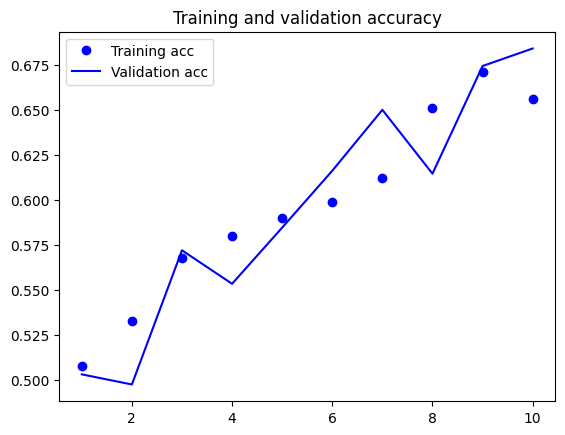

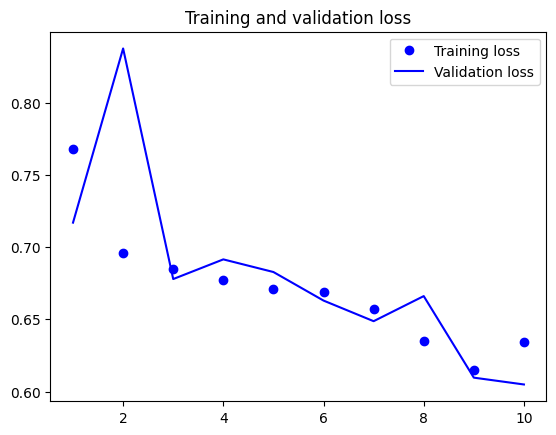

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
model = models.Sequential()
model.add(layers.Embedding(num_words,32))
model.add(layers.LSTM(32))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer= optimizers.RMSprop(),loss='binary_crossentropy',metrics = ['mae'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
history = model.fit(x_train,y_train,batch_size=128,epochs=10,validation_split=0.2,callbacks=[early_stopping,checkpoint_callback])

Epoch 1/10
250/250 [==============================] - 17s 58ms/step - loss: 0.5975 - mae: 0.4231 - val_loss: 0.4473 - val_mae: 0.2961
Epoch 2/10
250/250 [==============================] - 18s 70ms/step - loss: 0.3958 - mae: 0.2538 - val_loss: 0.4058 - val_mae: 0.2521
Epoch 3/10
250/250 [==============================] - 17s 70ms/step - loss: 0.3428 - mae: 0.2124 - val_loss: 0.4431 - val_mae: 0.2780
Epoch 4/10
250/250 [==============================] - 19s 76ms/step - loss: 0.3140 - mae: 0.1906 - val_loss: 0.4051 - val_mae: 0.2143
Epoch 5/10
250/250 [==============================] - 23s 92ms/step - loss: 0.2962 - mae: 0.1786 - val_loss: 0.4725 - val_mae: 0.2241
Epoch 6/10
250/250 [==============================] - 30s 122ms/step - loss: 0.2794 - mae: 0.1669 - val_loss: 0.4791 - val_mae: 0.2557
Epoch 7/10
250/250 [==============================] - 24s 96ms/step - loss: 0.2642 - mae: 0.1575 - val_loss: 0.4121 - val_mae: 0.2263


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


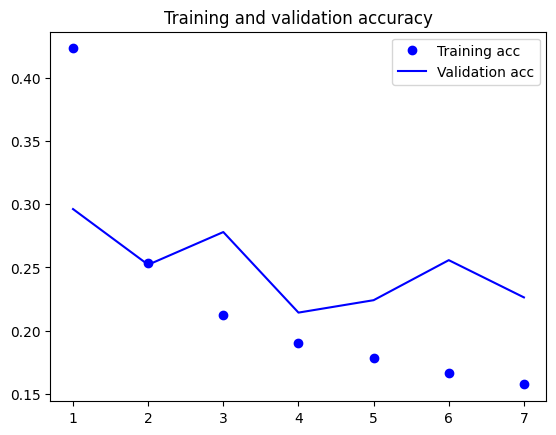

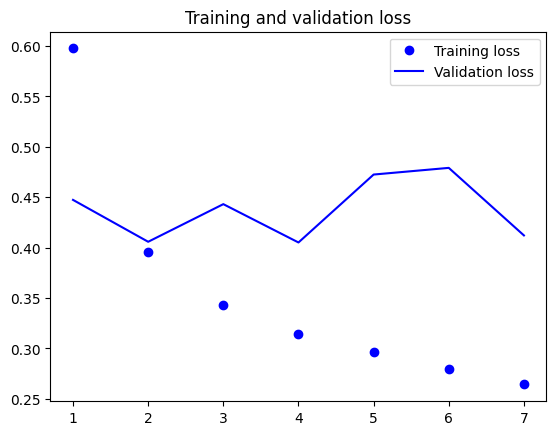

In [27]:
print(history.history.keys())
acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()validation_split=0.2
plt.show()

In [28]:
model = models.Sequential()
model.add(layers.Embedding(num_words,32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(),loss='binary_crossentropy',metrics=['acc'])

In [29]:
history = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2,callbacks=[early_stopping,checkpoint_callback])

Epoch 1/10
250/250 [==============================] - 48s 170ms/step - loss: 0.5731 - acc: 0.6823 - val_loss: 0.4215 - val_acc: 0.8067
Epoch 2/10
250/250 [==============================] - 41s 163ms/step - loss: 0.3823 - acc: 0.8353 - val_loss: 0.3979 - val_acc: 0.8176
Epoch 3/10
250/250 [==============================] - 50s 199ms/step - loss: 0.3330 - acc: 0.8613 - val_loss: 0.3846 - val_acc: 0.8278
Epoch 4/10
250/250 [==============================] - 38s 150ms/step - loss: 0.3077 - acc: 0.8737 - val_loss: 0.3867 - val_acc: 0.8235
Epoch 5/10
250/250 [==============================] - 33s 133ms/step - loss: 0.2853 - acc: 0.8852 - val_loss: 0.3763 - val_acc: 0.8269
Epoch 6/10
250/250 [==============================] - 32s 128ms/step - loss: 0.2670 - acc: 0.8932 - val_loss: 0.4002 - val_acc: 0.8206
Epoch 7/10
250/250 [==============================] - 30s 118ms/step - loss: 0.2497 - acc: 0.9010 - val_loss: 0.4359 - val_acc: 0.8235
Epoch 8/10
250/250 [==============================] - 3

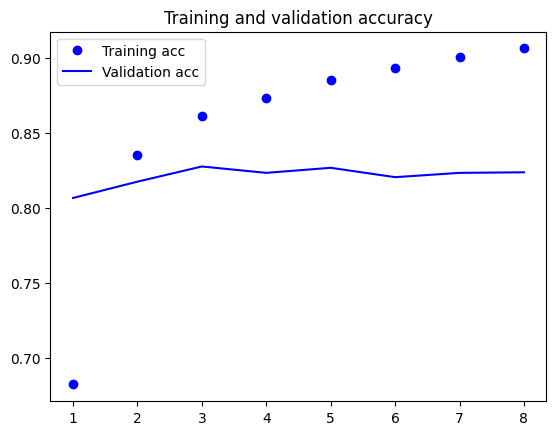

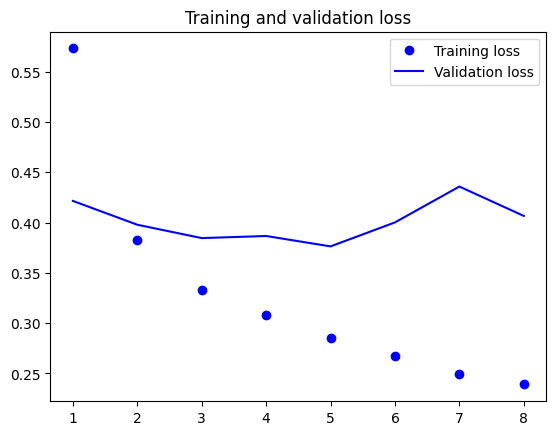

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
model = models.Sequential()
model.add(layers.Embedding(num_words, 32, input_length=max_len))

model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(32, return_sequences=True)))

model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())

model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)))


In [32]:
model.compile(optimizer=optimizers.RMSprop(),loss='binary_crossentropy',metrics=['acc'])

In [33]:
history = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2,callbacks=[early_stopping,checkpoint_callback])

Epoch 1/10
250/250 [==============================] - 153s 574ms/step - loss: 0.5835 - acc: 0.7848 - val_loss: 0.9282 - val_acc: 0.5026
Epoch 2/10
250/250 [==============================] - 131s 524ms/step - loss: 0.3858 - acc: 0.8539 - val_loss: 1.2219 - val_acc: 0.5027
Epoch 3/10
250/250 [==============================] - 131s 526ms/step - loss: 0.3215 - acc: 0.8727 - val_loss: 1.1959 - val_acc: 0.6941
Epoch 4/10
250/250 [==============================] - 137s 548ms/step - loss: 0.2804 - acc: 0.8898 - val_loss: 1.3216 - val_acc: 0.4991


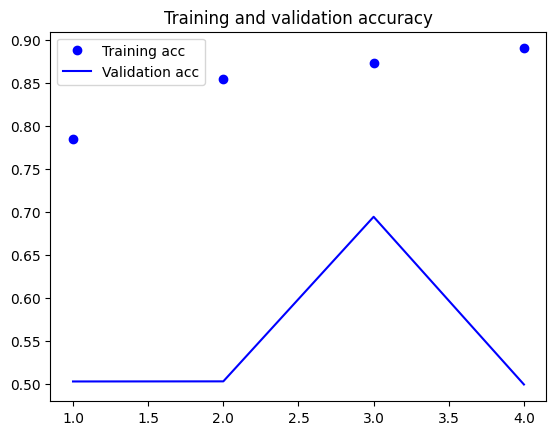

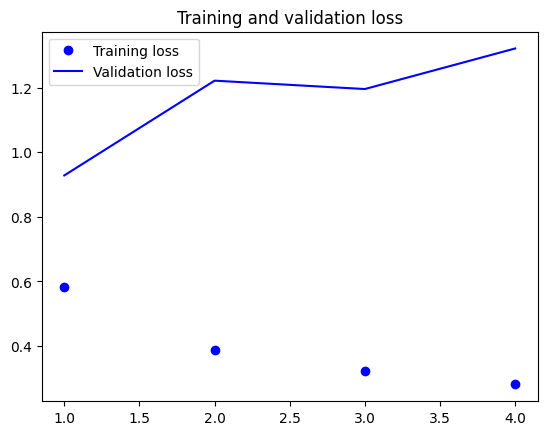

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
model = models.Sequential()

model.add(layers.Embedding(num_words, 32, input_length=max_len))

model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)))
model.add(layers.Bidirectional(layers.LSTM(32, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)))

model.add(layers.GlobalAveragePooling1D())

model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

In [36]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 32)           320000    
                                                                 
 bidirectional_3 (Bidirecti  (None, 100, 128)          49664     
 onal)                                                           
                                                                 
 bidirectional_4 (Bidirecti  (None, 100, 64)           41216     
 onal)                                                           
                                                                 
 global_average_pooling1d_1  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                      

In [37]:

early_stopping = EarlyStopping(monitor='val_acc', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=2, min_lr=0.001)

history = model.fit( x_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])


Epoch 1/20
1000/1000 [==============================] - 396s 384ms/step - loss: 0.9693 - accuracy: 0.7164 - val_loss: 0.4677 - val_accuracy: 0.8145 - lr: 0.0010
Epoch 2/20
1000/1000 [==============================] - 432s 432ms/step - loss: 0.4172 - accuracy: 0.8396 - val_loss: 0.4248 - val_accuracy: 0.8185 - lr: 0.0010
Epoch 3/20
1000/1000 [==============================] - 545s 544ms/step - loss: 0.3606 - accuracy: 0.8630 - val_loss: 0.4372 - val_accuracy: 0.8273 - lr: 0.0010
Epoch 4/20
1000/1000 [==============================] - 608s 609ms/step - loss: 0.3306 - accuracy: 0.8797 - val_loss: 0.4214 - val_accuracy: 0.8204 - lr: 0.0010
Epoch 5/20
1000/1000 [==============================] - 470s 470ms/step - loss: 0.3025 - accuracy: 0.8974 - val_loss: 0.4319 - val_accuracy: 0.8209 - lr: 0.0010
Epoch 6/20
1000/1000 [==============================] - 532s 532ms/step - loss: 0.2824 - accuracy: 0.9076 - val_loss: 0.4725 - val_accuracy: 0.8223 - lr: 0.0010
Epoch 7/20
1000/1000 [============

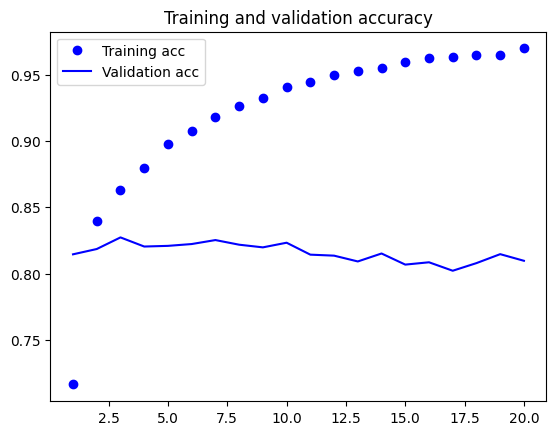

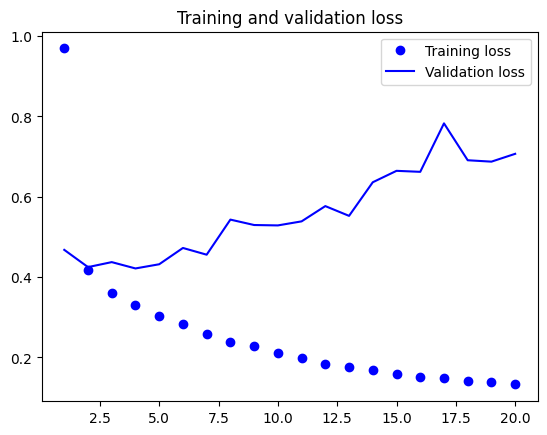

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [40]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 17s 50ms/step - loss: 0.6758 - accuracy: 0.8174


[0.6758124232292175, 0.8173999786376953]